In [1]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
os.chdir("C:\\Users\\18174") #change to directory where csv is 

In [3]:
data = pd.read_csv("GPA.csv") #read csv with pandas data reader 

# Descriptive Statistics

In [4]:
data.describe() #get descriptive statistics for each variable 

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


# Define the dependent & independent variables

In [5]:
y = data['GPA'] #define independent variable 
x1 = data['SAT'] #define dependent variable 

# Explore the Data

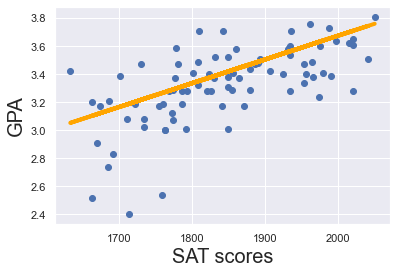

In [6]:
plt.scatter(x1, y)  #plot the data on scatter plot and look for a pattern you can draw a line through 
yhat = .0017*x1 + .2750 #plot yhat from the results of linear regression 
fig = plt.plot(x1 , yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel(xlabel = 'SAT scores', fontsize = 20) #x label 
plt.ylabel(ylabel = 'GPA', fontsize = 20) #y label 
plt.show()#each point on the graph represents a different student, can see strong relationship between SAT and GPA 

# Regression

In [7]:
x = sm.add_constant(x1) #create x variable which calls stats models and adds the constant
results = sm.OLS(y,x).fit() #in a results variable store Ordinary least squares from statsmodels and use format (y,x) 
results.summary() #get regression summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           7.20e-11
Time:                        15:43:41   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Prediction: If someone made a 1700 on their SAT then their predicted GPA would be 3.165
.0017*1700 + .2750

3.1649999999999996

# Multiple Linear Regression

In [9]:
data = pd.read_csv("1.02. Multiple linear regression.csv")

In [10]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']] #feed in a list for multiple variables 

In [11]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [12]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           6.58e-10
Time:                        15:43:41   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
raw_data = pd.read_csv("1.03 Dummies.csv")


In [14]:
raw_data
data = raw_data.copy()
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [15]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, #map boolean variable by feeding in a dictionary with 1 being yes and 0 being no 
                                          'No': 0})

In [16]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [17]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [18]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [19]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           2.19e-15
Time:                        15:43:41   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'GPA')

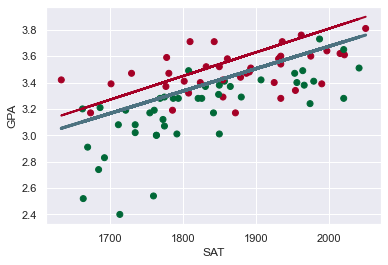

In [20]:
plt.scatter(data['SAT'],y, c = data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = .0017*data['SAT'] + .2750
yhat_yes = .0018 *data['SAT'] + .2088
yhat = .0017*data['SAT'] + .2750 
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw =2, c = '#a50026')
fig = plt.plot(data['SAT'] , yhat, lw = 3, c = '#4C7280', label = 'regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')


# How to make predictions based on the Regressions we Create

In [21]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]}) #create new data frame #const column always 1 
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [22]:
predictions = results.predict(new_data) #can use predict method with a data frame 

In [23]:
predictions

0    3.023513
1    3.204163
dtype: float64

In [24]:
predictions = pd.DataFrame(data = predictions)
joined = new_data.join(predictions)
joined = joined.rename(index = {0:'Bob', 1: 'Alice'})
joined=joined.rename(columns={0:'predictions'})

In [25]:
joined

,const,SAT,Attendance,predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [26]:
new_data = pd.DataFrame({'const':1, 'SAT': [1700,1700], 'Attendance' : [1,0]})
predictions = results.predict(new_data)
predictions = pd.DataFrame(predictions)
joined = predictions.join(new_data)
joined = joined.rename(index={0:'Alice', 1:'Bob'})
joined

,0,const,SAT,Attendance
Alice,3.246157,1,1700,1
Bob,3.023513,1,1700,0


# Multiple Linear Regression with sklearn

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
data = pd.read_csv("1.02. Multiple linear regression.csv")
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [29]:
y = data ['GPA']
x = data[['SAT', 'Rand 1,2,3']]

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(x,y)

LinearRegression()

In [32]:
reg.intercept_ #intercept and coefficent match output of regression tables below 

0.29603261264909486

In [33]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [34]:
reg.score(x,y)

0.4066811952814283

In [35]:
x.shape

(84, 2)

In [36]:
r2 = reg.score(x,y)

n = x.shape[0] #number of observations 

p = x.shape [1] #number of predictors 

Adjusted_r2 = 1 - (1 -r2) * (n - 1)/(n - p - 1)
Adjusted_r2

0.3920313482513401

In [37]:
x1 = x.copy()

In [38]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           6.58e-10
Time:                        15:43:42   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Selection

In [39]:
from sklearn.feature_selection import f_regression

In [40]:
y = data ['GPA']
x = data[['SAT', 'Rand 1,2,3']]

In [41]:
p_values = f_regression(x,y)[1]
p_values.round(3) #rounding to 3 is enough for p values interpretation 

array([0.   , 0.676])

# Creating a summary table 

In [42]:
reg_summary = pd.DataFrame(data =x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [43]:
reg_summary['coefficents'] =  reg.coef_

In [44]:
reg_summary

,Features,coefficents
0,SAT,0.001654
1,"Rand 1,2,3",-0.008270


In [45]:
p_values = f_regression(x,y)[1]
p_values.round(3) #rounding to 3 is enough for p values interpretation 

array([0.   , 0.676])

In [46]:
reg_summary["p_values"] = p_values.round(3)

In [47]:
reg_summary #p_values provides info on relevance but no info on how useful they are

,Features,coefficents,p_values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


# Features Scaling ( Standardization)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(x)

StandardScaler()

In [51]:
x_scaled = scaler.transform(x) #subtract mean and divide by Standard deviation for each value 

In [52]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

# Feature Selection throught Standardization of Weights

In [53]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [54]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [55]:
reg_summary = pd.DataFrame([['Intercept_'],['SAT'],['Rand 1,2,3']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_ [0], reg.coef_[1]

In [56]:
reg_summary  #create a summary table , weights close to 0 dont really influence prediction 

,Features,Weights
0,Intercept_,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


# Make Predictions with the Standardized Coefficents (weights)

In [57]:
new_data = pd.DataFrame(data = [[1700,2],[1800,1]], columns = ['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [58]:
#reg.predict(new_data) results in erorr ,need to standardize 

In [59]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [60]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

In [61]:
#what if wanted to remove the rand 1,2,3 column?
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [62]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

# Overfitting

In [63]:
#two concepts interrelated: underfitting and overfitting, overfitting means regression focused on particular dataset so much missed the point 

In [64]:
#underfitting means hasnt captured logic of the data so it does not know what to do 

In [65]:
#with overfitting accuracy seems outstanding, split into training and test 

# Train Test Split

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split

In [93]:
a = np.arange(1,101)
b = np.arange(501,601)


In [116]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state = 42, shuffle = True)

# Explore the Result

In [117]:
a_train.shape, a_test.shape#training array 

((80,), (20,))

In [118]:
a_test.shape #testing array 

(20,)

In [119]:
a_train #each time split data get differenet training and testing datasets 

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [120]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [121]:
b_train

array([556, 589, 527, 543, 570, 516, 541, 597, 510, 573, 512, 548, 586,
       529, 594, 506, 567, 566, 536, 517, 550, 535, 508, 596, 528, 520,
       582, 526, 563, 514, 525, 504, 518, 539, 509, 579, 507, 565, 537,
       590, 557, 600, 555, 544, 551, 568, 547, 569, 562, 598, 580, 542,
       559, 549, 599, 558, 576, 533, 595, 560, 564, 585, 538, 530, 502,
       553, 522, 503, 524, 588, 592, 575, 587, 583, 521, 561, 572, 515,
       593, 552])

In [122]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])